In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cancer_classification.csv')

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


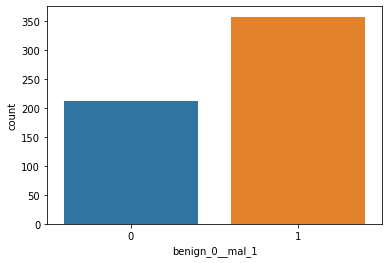

In [8]:
sns.countplot(x = 'benign_0__mal_1', data = df)

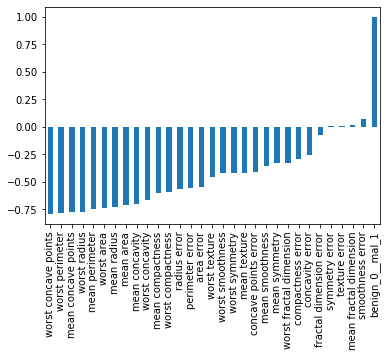

In [10]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind = 'bar')

In [53]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()

In [58]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
from tensorflow.keras.models import Sequential

In [36]:
from tensorflow.keras.layers import Dense, Dropout

In [37]:
X_train.shape

(426, 30)

In [41]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')


In [60]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 314us/sample - loss: 0.0071 - val_loss: 0.2253
Epoch 2/600
426/426 [==============================] - 0s 183us/sample - loss: 0.0069 - val_loss: 0.2204
Epoch 3/600
426/426 [==============================] - 0s 185us/sample - loss: 0.0087 - val_loss: 0.2208
Epoch 4/600
426/426 [==============================] - 0s 184us/sample - loss: 0.0062 - val_loss: 0.2432
Epoch 5/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0066 - val_loss: 0.2269
Epoch 6/600
426/426 [==============================] - 0s 181us/sample - loss: 0.0085 - val_loss: 0.2200
Epoch 7/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0068 - val_loss: 0.2334
Epoch 8/600
426/426 [==============================] - 0s 172us/sample - loss: 0.0059 - val_loss: 0.2209
Epoch 9/600
426/426 [==============================] - 0s 172us/sample - loss: 0.0061 - val_loss: 0.2349
Epoch 10/

Epoch 78/600
426/426 [==============================] - 0s 184us/sample - loss: 0.0040 - val_loss: 0.2653
Epoch 79/600
426/426 [==============================] - 0s 180us/sample - loss: 0.0053 - val_loss: 0.2520
Epoch 80/600
426/426 [==============================] - 0s 182us/sample - loss: 0.0041 - val_loss: 0.2655
Epoch 81/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0045 - val_loss: 0.2624
Epoch 82/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0048 - val_loss: 0.2861
Epoch 83/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0048 - val_loss: 0.2575
Epoch 84/600
426/426 [==============================] - 0s 180us/sample - loss: 0.0045 - val_loss: 0.2553
Epoch 85/600
426/426 [==============================] - 0s 186us/sample - loss: 0.0042 - val_loss: 0.2747
Epoch 86/600
426/426 [==============================] - 0s 176us/sample - loss: 0.0050 - val_loss: 0.2613
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 229us/sample - loss: 0.0032 - val_loss: 0.2872
Epoch 156/600
426/426 [==============================] - 0s 208us/sample - loss: 0.0025 - val_loss: 0.3139
Epoch 157/600
426/426 [==============================] - 0s 225us/sample - loss: 0.0028 - val_loss: 0.3043
Epoch 158/600
426/426 [==============================] - 0s 200us/sample - loss: 0.0025 - val_loss: 0.3076
Epoch 159/600
426/426 [==============================] - 0s 172us/sample - loss: 0.0024 - val_loss: 0.3034
Epoch 160/600
426/426 [==============================] - 0s 175us/sample - loss: 0.0024 - val_loss: 0.3126
Epoch 161/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0025 - val_loss: 0.3006
Epoch 162/600
426/426 [==============================] - 0s 172us/sample - loss: 0.0035 - val_loss: 0.3288
Epoch 163/600
426/426 [==============================] - 0s 166us/sample - loss: 0.0037 - val_loss: 0.3119
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 176us/sample - loss: 0.0026 - val_loss: 0.3544
Epoch 232/600
426/426 [==============================] - 0s 181us/sample - loss: 0.0017 - val_loss: 0.3618
Epoch 233/600
426/426 [==============================] - 0s 184us/sample - loss: 0.0016 - val_loss: 0.3641
Epoch 234/600
426/426 [==============================] - 0s 174us/sample - loss: 0.0016 - val_loss: 0.3626
Epoch 235/600
426/426 [==============================] - 0s 189us/sample - loss: 0.0016 - val_loss: 0.3599
Epoch 236/600
426/426 [==============================] - 0s 179us/sample - loss: 0.0017 - val_loss: 0.3726
Epoch 237/600
426/426 [==============================] - 0s 176us/sample - loss: 0.0015 - val_loss: 0.3632
Epoch 238/600
426/426 [==============================] - 0s 173us/sample - loss: 0.0018 - val_loss: 0.3689
Epoch 239/600
426/426 [==============================] - 0s 192us/sample - loss: 0.0019 - val_loss: 0.3676
Epoch 240/600
426/426 [============================

426/426 [==============================] - 0s 179us/sample - loss: 9.3359e-04 - val_loss: 0.4109
Epoch 308/600
426/426 [==============================] - 0s 181us/sample - loss: 9.5601e-04 - val_loss: 0.4120
Epoch 309/600
426/426 [==============================] - 0s 176us/sample - loss: 0.0011 - val_loss: 0.4400
Epoch 310/600
426/426 [==============================] - 0s 172us/sample - loss: 0.0019 - val_loss: 0.3878
Epoch 311/600
426/426 [==============================] - 0s 171us/sample - loss: 0.0044 - val_loss: 0.4134
Epoch 312/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0071 - val_loss: 0.3918
Epoch 313/600
426/426 [==============================] - 0s 177us/sample - loss: 0.0052 - val_loss: 0.3621
Epoch 314/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0042 - val_loss: 0.3734
Epoch 315/600
426/426 [==============================] - 0s 174us/sample - loss: 0.0035 - val_loss: 0.4803
Epoch 316/600
426/426 [====================

426/426 [==============================] - 0s 181us/sample - loss: 8.6275e-04 - val_loss: 0.4413
Epoch 384/600
426/426 [==============================] - 0s 194us/sample - loss: 0.0011 - val_loss: 0.4500
Epoch 385/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0010 - val_loss: 0.4535
Epoch 386/600
426/426 [==============================] - 0s 171us/sample - loss: 8.3945e-04 - val_loss: 0.4447
Epoch 387/600
426/426 [==============================] - 0s 180us/sample - loss: 0.0010 - val_loss: 0.4570
Epoch 388/600
426/426 [==============================] - 0s 176us/sample - loss: 8.7602e-04 - val_loss: 0.4523
Epoch 389/600
426/426 [==============================] - 0s 170us/sample - loss: 8.6363e-04 - val_loss: 0.4630
Epoch 390/600
426/426 [==============================] - 0s 172us/sample - loss: 8.1532e-04 - val_loss: 0.4617
Epoch 391/600
426/426 [==============================] - 0s 171us/sample - loss: 7.7643e-04 - val_loss: 0.4642
Epoch 392/600
426/426 [====

426/426 [==============================] - 0s 182us/sample - loss: 4.8547e-04 - val_loss: 0.4893
Epoch 458/600
426/426 [==============================] - 0s 183us/sample - loss: 4.7216e-04 - val_loss: 0.4856
Epoch 459/600
426/426 [==============================] - 0s 172us/sample - loss: 4.6605e-04 - val_loss: 0.4895
Epoch 460/600
426/426 [==============================] - 0s 172us/sample - loss: 4.8049e-04 - val_loss: 0.4932
Epoch 461/600
426/426 [==============================] - 0s 166us/sample - loss: 4.8102e-04 - val_loss: 0.4929
Epoch 462/600
426/426 [==============================] - 0s 180us/sample - loss: 5.3021e-04 - val_loss: 0.4886
Epoch 463/600
426/426 [==============================] - 0s 182us/sample - loss: 4.5853e-04 - val_loss: 0.4890
Epoch 464/600
426/426 [==============================] - 0s 181us/sample - loss: 4.5148e-04 - val_loss: 0.4952
Epoch 465/600
426/426 [==============================] - 0s 176us/sample - loss: 4.4049e-04 - val_loss: 0.4912
Epoch 466/600
4

Epoch 531/600
426/426 [==============================] - 0s 180us/sample - loss: 3.1667e-04 - val_loss: 0.5351
Epoch 532/600
426/426 [==============================] - 0s 180us/sample - loss: 3.2451e-04 - val_loss: 0.5315
Epoch 533/600
426/426 [==============================] - 0s 196us/sample - loss: 3.4885e-04 - val_loss: 0.5313
Epoch 534/600
426/426 [==============================] - 0s 177us/sample - loss: 4.1593e-04 - val_loss: 0.5429
Epoch 535/600
426/426 [==============================] - 0s 174us/sample - loss: 3.4594e-04 - val_loss: 0.5299
Epoch 536/600
426/426 [==============================] - 0s 169us/sample - loss: 3.3431e-04 - val_loss: 0.5304
Epoch 537/600
426/426 [==============================] - 0s 180us/sample - loss: 3.0156e-04 - val_loss: 0.5365
Epoch 538/600
426/426 [==============================] - 0s 173us/sample - loss: 2.9429e-04 - val_loss: 0.5302
Epoch 539/600
426/426 [==============================] - 0s 178us/sample - loss: 2.9733e-04 - val_loss: 0.5266
E

In [61]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.007051,0.225313
1,0.006852,0.220394
2,0.008676,0.220779
3,0.006246,0.243247
4,0.006576,0.226865
...,...,...
595,0.000215,0.577205
596,0.000233,0.575604
597,0.000223,0.577388
598,0.000228,0.578749


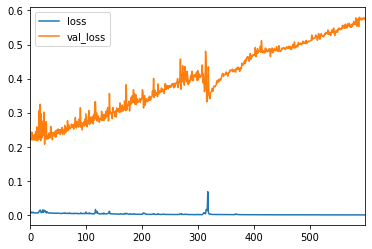

In [62]:
losses.plot()

In [64]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience =25)

In [67]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test), callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6774 - val_loss: 0.6594
Epoch 2/600
426/426 [==============================] - 0s 200us/sample - loss: 0.6455 - val_loss: 0.6297
Epoch 3/600
426/426 [==============================] - 0s 178us/sample - loss: 0.6157 - val_loss: 0.6016
Epoch 4/600
426/426 [==============================] - 0s 188us/sample - loss: 0.5863 - val_loss: 0.5694
Epoch 5/600
426/426 [==============================] - 0s 164us/sample - loss: 0.5532 - val_loss: 0.5347
Epoch 6/600
426/426 [==============================] - 0s 184us/sample - loss: 0.5170 - val_loss: 0.4967
Epoch 7/600
426/426 [==============================] - 0s 167us/sample - loss: 0.4795 - val_loss: 0.4556
Epoch 8/600
426/426 [==============================] - 0s 176us/sample - loss: 0.4400 - val_loss: 0.4146
Epoch 9/600
426/426 [==============================] - 0s 170us/sample - loss: 0.4008 - val_loss: 0.3757
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 192us/sample - loss: 0.0570 - val_loss: 0.1104
Epoch 79/600
426/426 [==============================] - 0s 180us/sample - loss: 0.0568 - val_loss: 0.1093
Epoch 80/600
426/426 [==============================] - 0s 180us/sample - loss: 0.0622 - val_loss: 0.1097
Epoch 81/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0562 - val_loss: 0.1131
Epoch 82/600
426/426 [==============================] - 0s 174us/sample - loss: 0.0553 - val_loss: 0.1083
Epoch 83/600
426/426 [==============================] - 0s 177us/sample - loss: 0.0570 - val_loss: 0.1096
Epoch 84/600
426/426 [==============================] - 0s 191us/sample - loss: 0.0548 - val_loss: 0.1163
Epoch 85/600
426/426 [==============================] - 0s 177us/sample - loss: 0.0560 - val_loss: 0.1105
Epoch 86/600
426/426 [==============================] - 0s 182us/sample - loss: 0.0547 - val_loss: 0.1151
Epoch 87/600
426/426 [========================

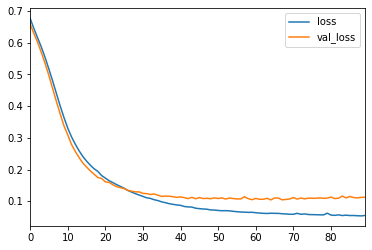

In [68]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [75]:
from tensorflow.keras.layers import Dropout


In [76]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [77]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test), callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6821 - val_loss: 0.6736
Epoch 2/600
426/426 [==============================] - 0s 189us/sample - loss: 0.6666 - val_loss: 0.6640
Epoch 3/600
426/426 [==============================] - 0s 195us/sample - loss: 0.6669 - val_loss: 0.6557
Epoch 4/600
426/426 [==============================] - 0s 192us/sample - loss: 0.6504 - val_loss: 0.6433
Epoch 5/600
426/426 [==============================] - 0s 177us/sample - loss: 0.6291 - val_loss: 0.6215
Epoch 6/600
426/426 [==============================] - 0s 179us/sample - loss: 0.6158 - val_loss: 0.5916
Epoch 7/600
426/426 [==============================] - 0s 175us/sample - loss: 0.6274 - val_loss: 0.5692
Epoch 8/600
426/426 [==============================] - 0s 180us/sample - loss: 0.5810 - val_loss: 0.5418
Epoch 9/600
426/426 [==============================] - 0s 179us/sample - loss: 0.5668 - val_loss: 0.5142
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 216us/sample - loss: 0.1147 - val_loss: 0.0857
Epoch 79/600
426/426 [==============================] - 0s 192us/sample - loss: 0.1417 - val_loss: 0.0831
Epoch 80/600
426/426 [==============================] - 0s 175us/sample - loss: 0.1176 - val_loss: 0.0769
Epoch 81/600
426/426 [==============================] - 0s 174us/sample - loss: 0.1178 - val_loss: 0.0787
Epoch 82/600
426/426 [==============================] - 0s 186us/sample - loss: 0.1061 - val_loss: 0.0843
Epoch 83/600
426/426 [==============================] - 0s 198us/sample - loss: 0.1126 - val_loss: 0.0759
Epoch 84/600
426/426 [==============================] - 0s 193us/sample - loss: 0.1067 - val_loss: 0.0781
Epoch 85/600
426/426 [==============================] - 0s 188us/sample - loss: 0.1052 - val_loss: 0.0783
Epoch 86/600
426/426 [==============================] - 0s 192us/sample - loss: 0.1127 - val_loss: 0.0752
Epoch 87/600
426/426 [========================

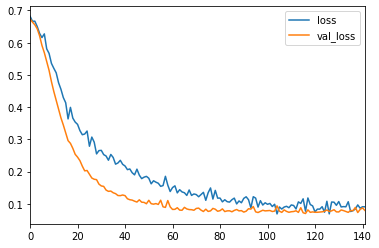

In [78]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [79]:
predictions = model.predict_classes(X_test)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [82]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 2 86]]
